In [1]:
# Librerias necesarias
from CoffeaDelphes import Converter
import numpy as np
import matplotlib.pyplot as plt
from hist import Hist
import mplhep as hep
import pandas as pd
plt.style.use([hep.style.ROOT])

import warnings
warnings.filterwarnings('ignore')

In [33]:
runs = ["run_0{}".format(x+1) if x < 9 else "run_{}".format(x+1) for x in range(21) ]

In [34]:
fname = ["/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/{}/tag_1_delphes_events.root".format(run) for run in runs ]
fname

['/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_01/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_02/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_03/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_04/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_05/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_06/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_07/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_08/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_09/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_10/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_11/tag_1_delphes_events.root',
 '/cms/mc/MG5_aMC_v3_1_1/Zbbbar_schannel/Events/run_12/tag_1_delphes_events.root',
 '/c

In [35]:
tree = Converter(fname[0]) # Generar el objeto tree
events = {"Jet": ["PT", "Eta", "Phi", "Mass", "BTag"], "MissingET": ["MET", "Phi"]}
tree.generate(events) # ingresar en
data = tree.df

In [5]:
data.head()

,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_eta0,jet_eta1,jet_eta2,jet_eta3,jet_phi0,jet_phi1,...,jet_mass0,jet_mass1,jet_mass2,jet_mass3,jet_btag0,jet_btag1,jet_btag2,jet_btag3,missinget_met,missinget_phi
0,49.766636,22.000076,15.540462,12.993957,0.732920,3.576957,0.460618,-0.332936,-2.955821,-0.429333,...,10.035754,2.523244,2.507966e+00,2.878206,0.0,0.0,0.0,0.0,22.043629,0.317358
1,43.527985,33.257496,11.519303,8.779058,1.802477,2.784046,0.613198,0.826044,2.700448,-0.334208,...,5.690470,4.190277,-1.685874e-07,1.172311,0.0,0.0,0.0,0.0,24.521704,-0.070003
2,31.341011,25.956022,12.884939,11.498661,2.758761,4.300023,1.164700,-1.292872,-0.650612,2.326473,...,4.790336,4.203971,2.118908e+00,2.110380,0.0,0.0,0.0,0.0,8.981977,-1.078047
3,37.145149,29.016415,16.852125,9.148043,-2.616840,-3.913533,-1.028525,-4.105178,1.714193,-0.665438,...,4.786722,3.441108,2.382083e+00,1.309144,0.0,0.0,0.0,0.0,1.926296,1.420844
4,13.395885,4.819166,4.721497,4.709152,3.915345,1.451118,3.384626,3.906830,-2.832071,-1.524035,...,2.906953,0.933597,5.295412e-01,0.000002,0.0,0.0,0.0,0.0,8.514373,1.139108


In [6]:
data.columns

Index(['jet_pt0', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0', 'jet_eta1',
       'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2', 'jet_phi3',
       'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3', 'jet_btag0',
       'jet_btag1', 'jet_btag2', 'jet_btag3', 'missinget_met',
       'missinget_phi'],
      dtype='object')

In [7]:
# formulas para Delta phi, Abs Delta phi y DeltaR
def DeltaPhi(i,row, col1, col2):
    """
    correction on azimuthal angle difference dphi
    """
    dphi = (row[col1] - row[col2])[i]
    if dphi >= np.pi:
        dphi -= 2*np.pi
    if dphi < -np.pi:
        dphi += 2*np.pi
    return dphi

def AbsDeltaPhi(i,rowa, col1a, col2a = 'met_Phi'):
    return np.abs(DeltaPhi(i,rowa, col1a, col2a))

def DeltaR(Deta,Dphi):
    return np.sqrt( Deta**2 + Dphi**2 )

In [8]:
def pt_jet(data,feature,min_range,max_range, bin):
    '''
    Realiza un grafico de cada objeto.
    '''
    
    #fig = plt.figure(figsize=(6,4))
    box_style=dict(boxstyle='square', alpha=0.5)
    text = "n_events: {}".format(data[feature].count())+"\n" \
            +"mean: {}".format(np.round(data[feature].mean(),2))+"\n" \
            +"std: {}".format(np.round(data[feature].std(),2))
    plt.hist(data[feature],bins=bin)
    
    ax = plt.gca()
    p = ax.patches  
    heights = [patch.get_height() for patch in p]
    if feature[:6] == "Delta_": num = 3
    else: num = 1.8
    
    plt.title("Histograma del objeto: {}".format(feature),size=15)
    #plt.xlabel("pT [GeV]",size=10)
    plt.ylabel("Eventos",size=10)
    plt.text(max_range/num,max(heights)/1.3, text,bbox=box_style,size=12)
    plt.xlim(min_range,max_range)

## Hitogramas de pT para run_01

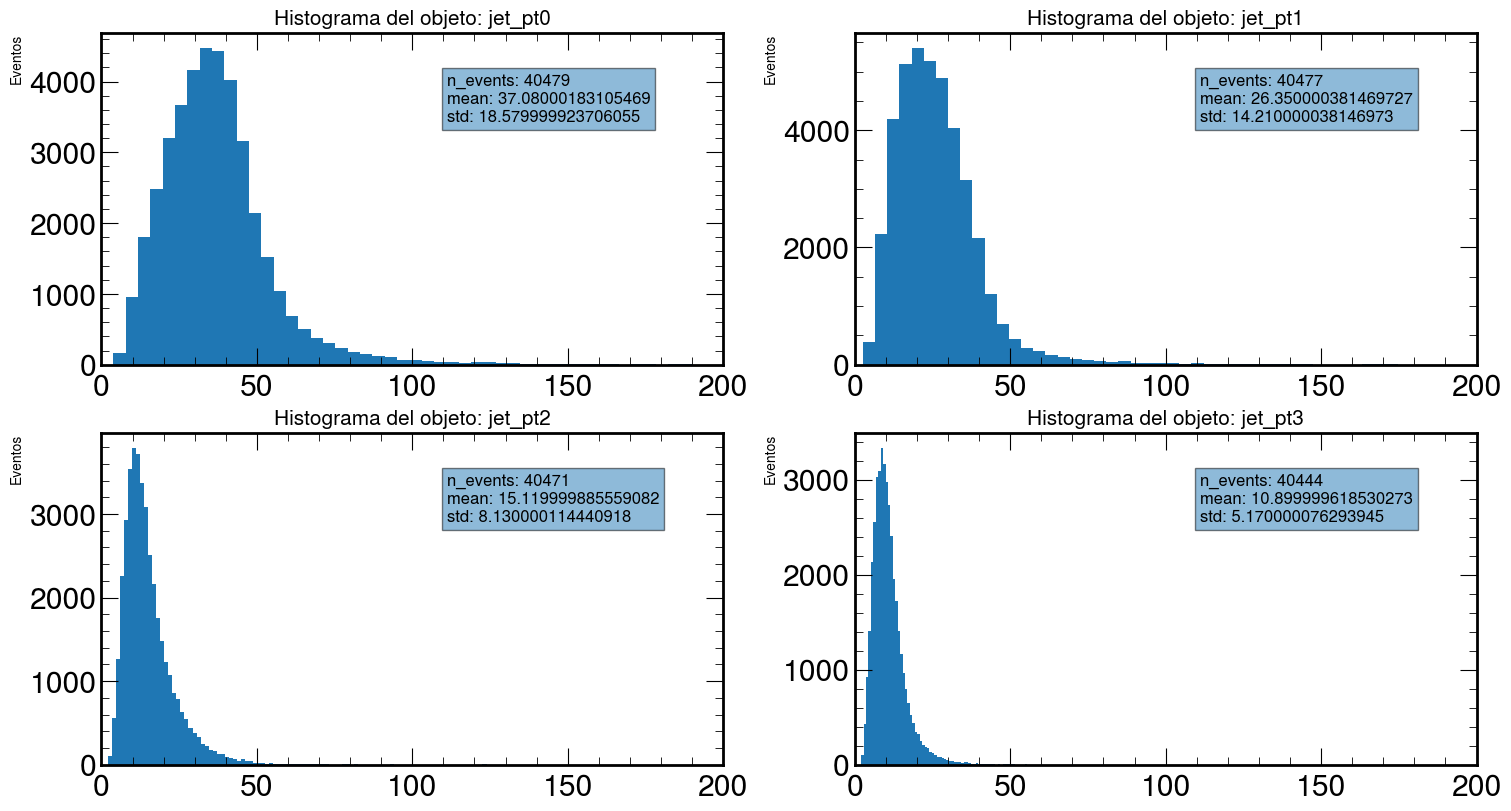

In [9]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(data,"jet_pt0",0,200,100)
plt.subplot(2,2,2)
pt_jet(data,"jet_pt1",0,200,100)
plt.subplot(2,2,3)
pt_jet(data,"jet_pt2",0,200,100)
plt.subplot(2,2,4)
pt_jet(data,"jet_pt3",0,200,100)

## Hitogramas de $\eta$ para run_01

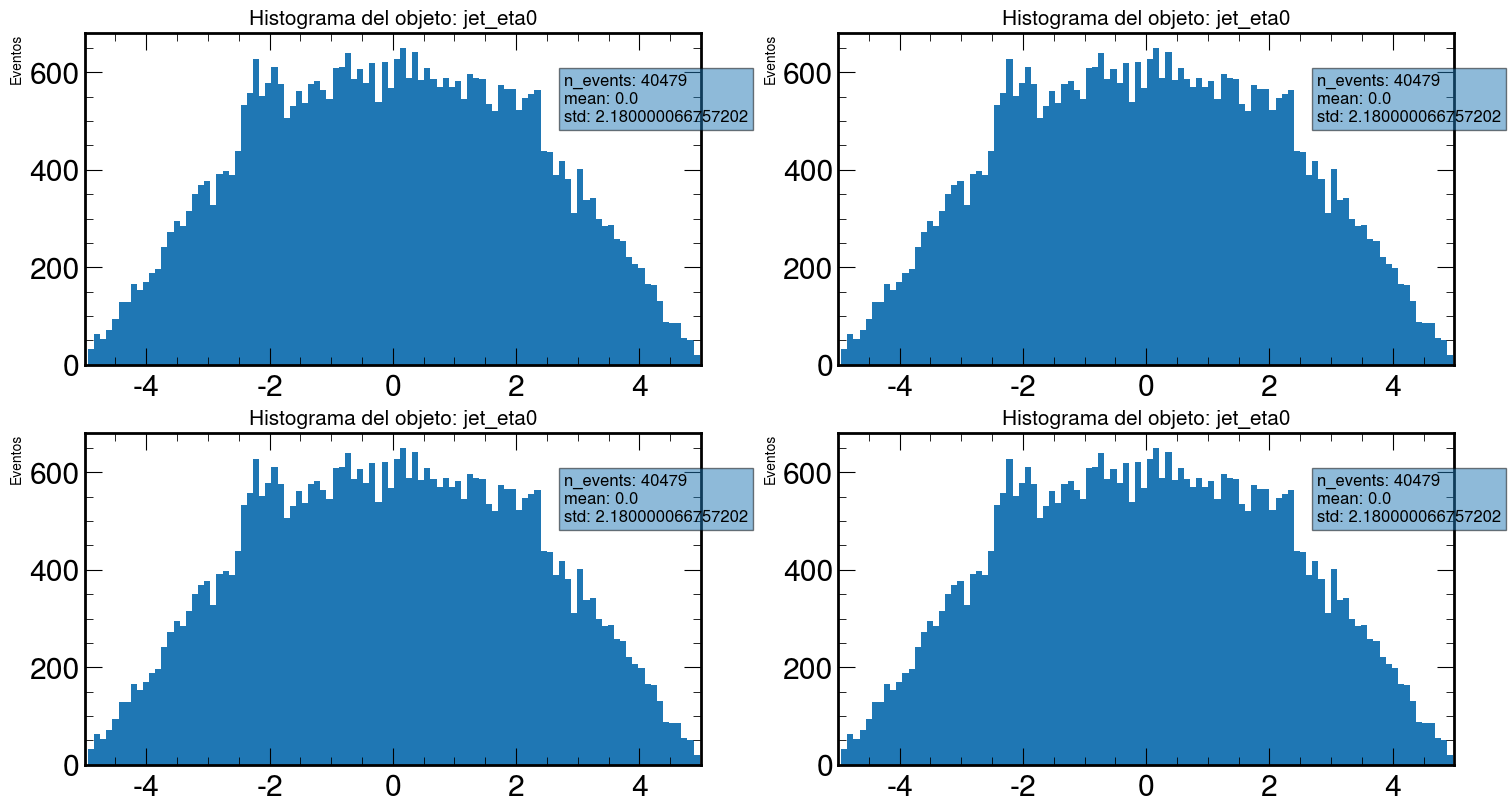

In [10]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(data,'jet_eta0',-5,5,100)
plt.subplot(2,2,2)
pt_jet(data,'jet_eta0',-5,5,100)
plt.subplot(2,2,3)
pt_jet(data,'jet_eta0',-5,5,100)
plt.subplot(2,2,4)
pt_jet(data,'jet_eta0',-5,5,100)

## Hitogramas de $\phi$ para run_01

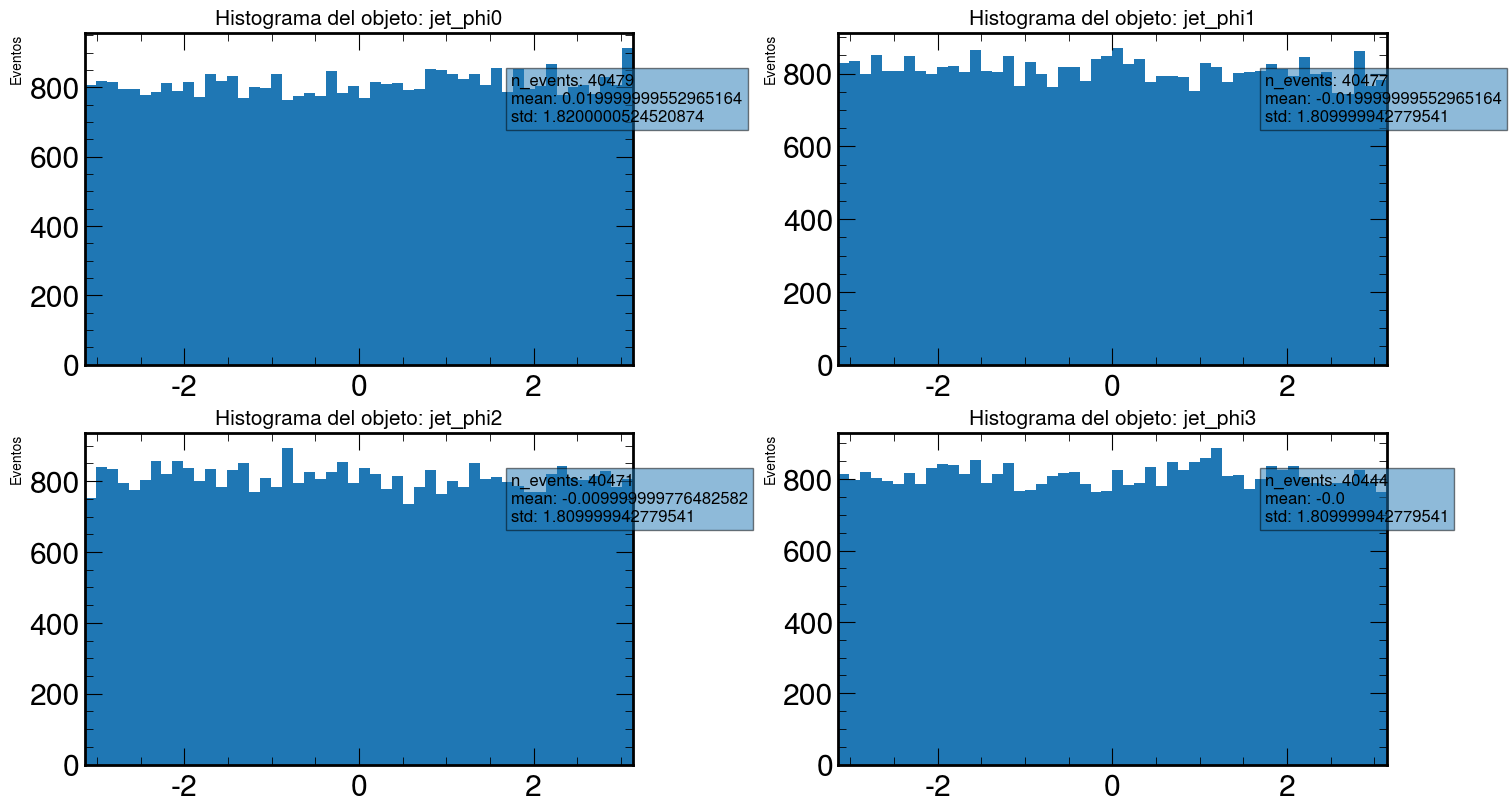

In [11]:
plt.figure(figsize=(15,8),constrained_layout=True)

plt.subplot(2,2,1)
pt_jet(data,'jet_phi0',-np.pi,np.pi,50)
plt.subplot(2,2,2)
pt_jet(data,'jet_phi1',-np.pi,np.pi,50)
plt.subplot(2,2,3)
pt_jet(data,'jet_phi2',-np.pi,np.pi,50)
plt.subplot(2,2,4)
pt_jet(data,'jet_phi3',-np.pi,np.pi,50)

## Analisis para los b-jets (b1,b2) en la run_01
Eventos con 2 jets taggeados como b

In [12]:
f = data[["jet_btag0","jet_btag1","jet_btag2","jet_btag3"]]
f_list = [ sum(f.loc[i]) for i in range(len(f)) ]
data.insert(1,"n_jets",f_list)

data_filtered = data[data["n_jets"] == 2]
print("Numero de eventos con 2 jets:",len(data_filtered))
data2 = data_filtered[["jet_btag0","jet_btag1","jet_btag2","jet_btag3","n_jets","jet_pt0","jet_pt1","jet_pt2","jet_pt3",'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3']]
data2.head()

Numero de eventos con 2 jets: 7330


,jet_btag0,jet_btag1,jet_btag2,jet_btag3,n_jets,jet_pt0,jet_pt1,jet_pt2,jet_pt3,jet_mass0,jet_mass1,jet_mass2,jet_mass3
6,1.0,0.0,0.0,1.0,2.0,19.393379,10.207476,6.240767,5.777122,3.096600,2.251030,0.376815,1.024425
8,1.0,1.0,0.0,0.0,2.0,32.055767,31.602999,6.987425,6.673363,6.419279,4.302526,1.237752,1.586928
21,1.0,1.0,0.0,0.0,2.0,30.307781,26.745689,22.093033,6.491794,4.424043,2.922203,4.843198,0.979918
31,1.0,1.0,0.0,0.0,2.0,40.389709,16.412298,10.564023,8.602764,7.247279,2.266398,1.884463,1.869094
47,1.0,1.0,0.0,0.0,2.0,45.631542,34.100296,11.894100,10.977970,7.529320,5.970905,2.715895,1.529626


In [13]:
data_filtered.columns

Index(['jet_pt0', 'n_jets', 'jet_pt1', 'jet_pt2', 'jet_pt3', 'jet_eta0',
       'jet_eta1', 'jet_eta2', 'jet_eta3', 'jet_phi0', 'jet_phi1', 'jet_phi2',
       'jet_phi3', 'jet_mass0', 'jet_mass1', 'jet_mass2', 'jet_mass3',
       'jet_btag0', 'jet_btag1', 'jet_btag2', 'jet_btag3', 'missinget_met',
       'missinget_phi'],
      dtype='object')

In [14]:
tag_pt = []
tag_eta = []
tag_phi = []
tag_mass = []
for i in range(data2.shape[0]):
    pt = []
    eta = []
    phi = []
    mass = []
    if data2.iloc[i][0] == 1.0: 
        pt.append(data_filtered.jet_pt0.to_list()[i])
        eta.append(data_filtered.jet_eta0.to_list()[i])
        phi.append(data_filtered.jet_phi0.to_list()[i])
        mass.append(data_filtered.jet_mass0.to_list()[i])
    if data2.iloc[i][1] == 1.0: 
        pt.append(data_filtered.jet_pt1.to_list()[i])
        eta.append(data_filtered.jet_eta1.to_list()[i])
        phi.append(data_filtered.jet_phi1.to_list()[i])
        mass.append(data_filtered.jet_mass1.to_list()[i])
    if data2.iloc[i][2] == 1.0: 
        pt.append(data_filtered.jet_pt2.to_list()[i])
        eta.append(data_filtered.jet_eta2.to_list()[i])
        phi.append(data_filtered.jet_phi2.to_list()[i])
        mass.append(data_filtered.jet_mass2.to_list()[i])
    if data2.iloc[i][3] == 1.0: 
        pt.append(data_filtered.jet_pt3.to_list()[i])
        eta.append(data_filtered.jet_eta3.to_list()[i])
        phi.append(data_filtered.jet_phi3.to_list()[i])
        mass.append(data_filtered.jet_mass3.to_list()[i])
    tag_pt.append(pt)
    tag_eta.append(eta)
    tag_phi.append(phi)
    tag_mass.append(mass)


jet_pt_b1 = [j[0] for j in tag_pt]
jet_pt_b2 = [j[1] for j in tag_pt]
jet_eta_b1 = [j[0] for j in tag_eta]
jet_eta_b2 = [j[1] for j in tag_eta]
jet_phi_b1 = [j[0] for j in tag_phi]
jet_phi_b2 = [j[1] for j in tag_phi]
jet_mass_b1 = [j[0] for j in tag_mass]
jet_mass_b2 = [j[1] for j in tag_mass]


di = {"jet_pt_b1":jet_pt_b1,"jet_pt_b2":jet_pt_b2,
      "jet_eta_b1":jet_eta_b1,"jet_eta_b2":jet_eta_b2,
      "jet_phi_b1":jet_phi_b1,"jet_phi_b2":jet_phi_b2,
      "jet_mass_b1":jet_mass_b1,"jet_mass_b2":jet_mass_b2}

data_bjet = pd.DataFrame(di)
data_bjet.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2
0,19.393379,5.777122,1.014040,-1.776975,1.385800,-0.925352,3.096600,1.024425
1,32.055767,31.602999,-1.842887,-2.135534,2.976409,-0.026138,6.419279,4.302526
2,30.307781,26.745689,0.362868,-1.276194,-1.337182,1.421419,4.424043,2.922203
3,40.389709,16.412298,0.111644,-1.463557,0.193683,-2.966999,7.247279,2.266398
4,45.631542,34.100296,-0.998331,-0.053873,-1.166278,1.899346,7.529320,5.970905


In [15]:
phi_cor = []
for i in range(len(data_bjet)):
    phi_cor.append(AbsDeltaPhi(i,data_bjet,"jet_phi_b1","jet_phi_b2"))

data_bjet['Delta_eta_b'] = data_bjet.jet_eta_b2 - data_bjet.jet_eta_b1
data_bjet['Delta_phi_b'] = phi_cor
data_bjet["DeltaR_b"] = DeltaR(data_bjet.Delta_eta_b,data_bjet.Delta_phi_b)

In [16]:
data_bjet.head()

,jet_pt_b1,jet_pt_b2,jet_eta_b1,jet_eta_b2,jet_phi_b1,jet_phi_b2,jet_mass_b1,jet_mass_b2,Delta_eta_b,Delta_phi_b,DeltaR_b
0,19.393379,5.777122,1.014040,-1.776975,1.385800,-0.925352,3.096600,1.024425,-2.791015,2.311151,3.623698
1,32.055767,31.602999,-1.842887,-2.135534,2.976409,-0.026138,6.419279,4.302526,-0.292647,3.002547,3.016774
2,30.307781,26.745689,0.362868,-1.276194,-1.337182,1.421419,4.424043,2.922203,-1.639062,2.758601,3.208800
3,40.389709,16.412298,0.111644,-1.463557,0.193683,-2.966999,7.247279,2.266398,-1.575201,3.122503,3.497325
4,45.631542,34.100296,-0.998331,-0.053873,-1.166278,1.899346,7.529320,5.970905,0.944458,3.065624,3.207811


## Histogramas para los pT(b1,b2) en la run_01

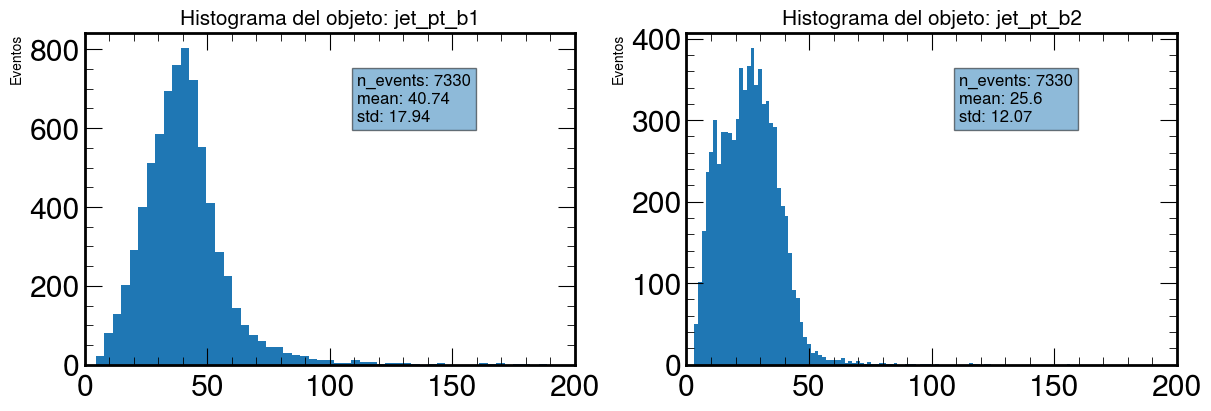

In [17]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,"jet_pt_b1",0,200,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,"jet_pt_b2",0,200,100)

## Histogramas para los $\eta$(b1,b2) en la run_01

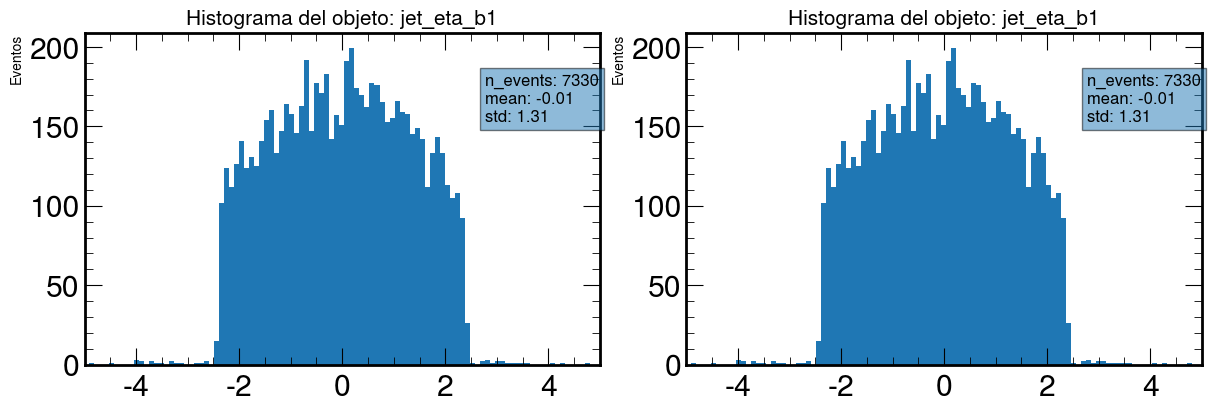

In [18]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'jet_eta_b1',-5,5,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'jet_eta_b1',-5,5,100)

## Histogramas para los $\phi$(b1,b2) en la run_01

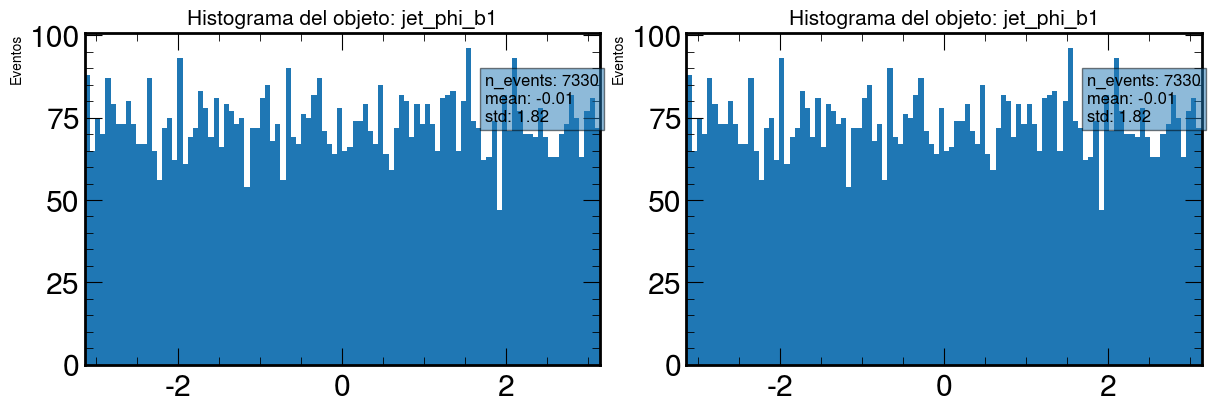

In [19]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'jet_phi_b1',-np.pi,np.pi,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'jet_phi_b1',-np.pi,np.pi,100)

## Histogramas para el $\Delta R$ en la run_01

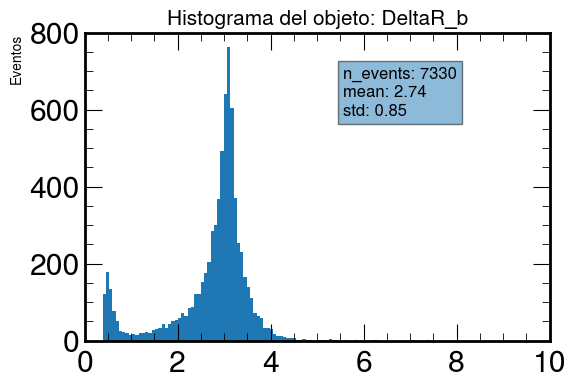

In [20]:
plt.figure(figsize=(6,4))
pt_jet(data_bjet,"DeltaR_b",0,10,100)

## Histogramas para los $\Delta \phi$, $\Delta \eta$ en la run_01
Notamos que el $\Delta \phi$ esta definido de 0 hasta $\pi$ y se grafica positivo debido a como esta definido el valor absoluto de esta cantidad

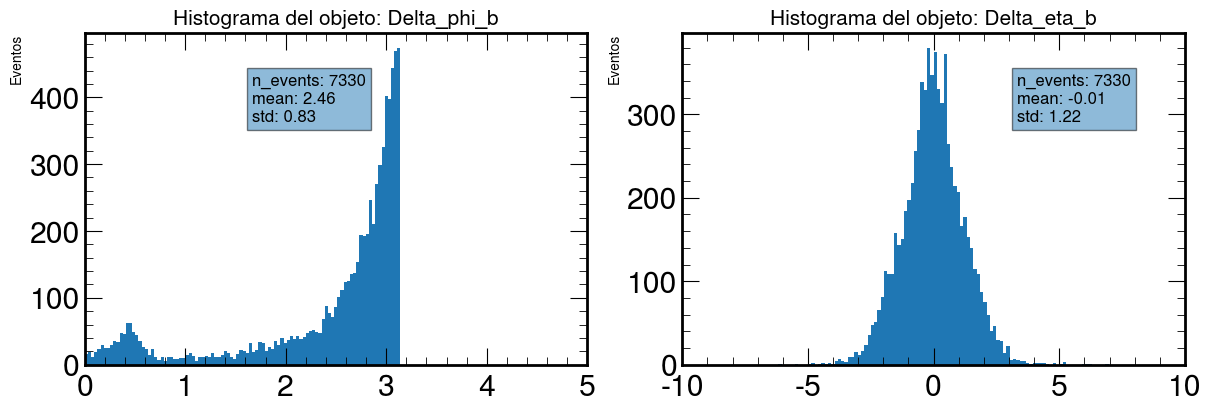

In [21]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'Delta_phi_b',0,5,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'Delta_eta_b',-10,10,100)


## Rapidez "$y$" en terminos de $\eta$
$\begin{equation}
y = ln \left ( \frac{\sqrt{m^{2} + p_{T}^{2}cosh^{2}(\eta)}+ p_{T}sinh(\eta)}{\sqrt{m^{2} + p_{T}^{2}}} \right )
\end{equation}$

referencia: [rapidez de particulas](https://hmong.es/wiki/Pseudorapidity)

In [27]:
def y(m,eta,pt):
    return np.log( (np.sqrt(m**2 + (pt**2)*(np.cosh(eta)**2)) + pt*np.sinh(eta)) / (np.sqrt(m**2 + pt**2)) )

y1 = y(data_bjet.jet_mass_b1,data_bjet.jet_eta_b1,data_bjet.jet_pt_b1)
y2 = y(data_bjet.jet_mass_b2,data_bjet.jet_eta_b2,data_bjet.jet_pt_b2)

data_bjet['y1'] = y1
data_bjet['y2'] = y2

## Histogramas de Rapidez $y(b1)=y1$,$y(b2)=y2$

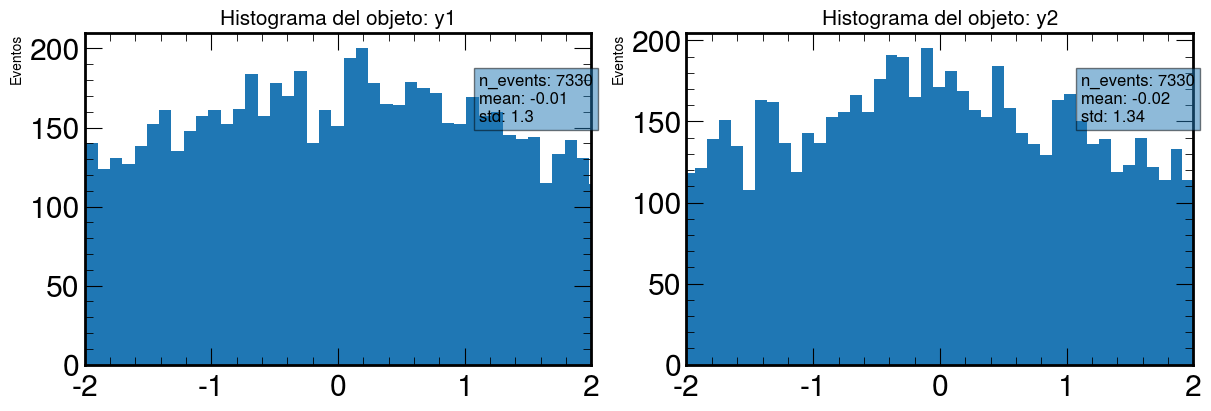

In [28]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,'y1',-2,2,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,'y2',-2,2,100)

## Masa invariante en Colisionadores de particulas:

$\begin{equation}
M^{2} = 2P_{T1}P_{T2}[ cosh(y_{1} - y_{2}) - cos(\phi _{1} - \phi _{2}) ]
\end{equation}$

In [29]:
def inv_mass(pt1,pt2,y1,y2,Dphi):
    return np.sqrt(2*pt1*pt2*(np.cosh(y1 - y2) - np.cos(Dphi)))

inv_m = inv_mass(data_bjet.jet_pt_b1,data_bjet.jet_pt_b2,
                 data_bjet.y1,data_bjet.y2,
                 data_bjet.Delta_phi_b)

data_bjet["inv_mass_b"] = inv_m # agregamos al dataset la masa invariante.

def inv_mass(pt1,pt2,Deta,Dphi):
    return np.sqrt(2*pt1*pt2*(np.cosh(Deta) - np.cos(Dphi)))

inv_m = inv_mass(data_bjet.jet_pt_b1,data_bjet.jet_pt_b2,
                 data_bjet.Delta_eta_b,
                 data_bjet.Delta_phi_b)

data_bjet["inv_mass_b_eta"] = inv_m # agregamos al dataset la masa invariante.

## Histograma para Masa invariante usando definicion de $y$ (izquierda) y usando la definicion de $\eta$ (derecha)

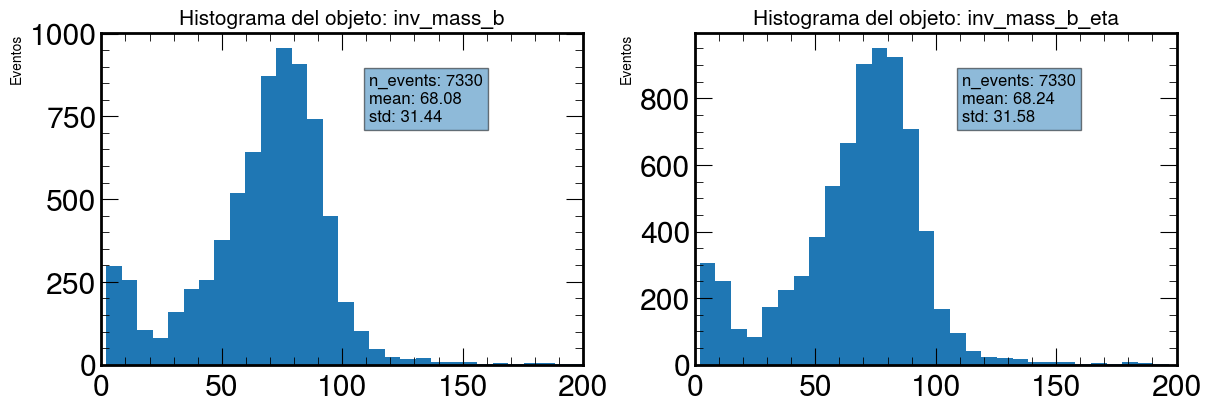

In [30]:
plt.figure(figsize=(12,4),constrained_layout=True)

plt.subplot(1,2,1)
pt_jet(data_bjet,"inv_mass_b",0,200,100)
plt.subplot(1,2,2)
pt_jet(data_bjet,"inv_mass_b_eta",0,200,100)

## MET

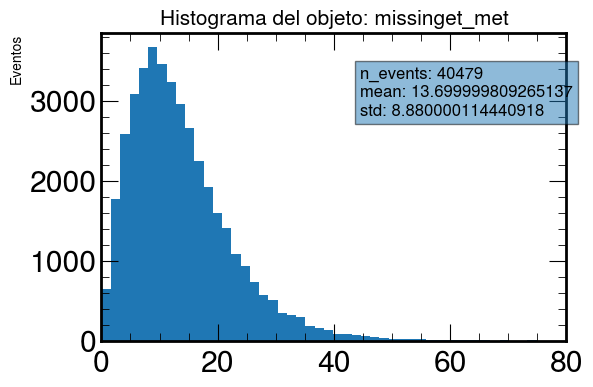

In [26]:
plt.figure(figsize=(6,4))
pt_jet(data,'missinget_met',0,80,100)